# CONSTRUÇÃO DE FEIXES ELEMENTARES

Alguns construtores de feixes elementares são implementados no módulo `optical.beam`. Novamente aqui, faremos primeiramente algumas pré-definições para a execução das células de código.

In [1]:
%cd -q ../../
from optical import beam
# módulo numpy: utilizado na computação de matrizes
import numpy as np
# módulo plotly: utilizado na construção de gráficos
from plotly import graph_objects as go

# construção da região simulada do plano transverso
x = np.linspace(-40.0, +40.0, 500); # 500 pontos entre -40 e +40
y = np.linspace(-40.0, +40.0, 500); # 500 pontos entre -40 e +40

X, Y = np.meshgrid(x, y);           # malha de pontos do plano transverso

# configuração dos gráficos
layout = lambda titulo: go.Layout(
    title = titulo,
    title_x = 0.5,                  # centraliza o título
    xaxis = dict(title = 'x(μm)'),
    yaxis = dict(title = 'y(μm)'),
    width = 900,
    height = 850
);

cmap = {
    'intensidade': 'inferno',
    'fase': 'greys'
};

## Feixes gaussianos

Um feixe gaussiano possui, para $z = 0$, uma envoltória da forma:

$$
    U_{w_0}(r) = \mathcal{A}\exp\left(-\frac{r^2}{w_0^2}\right)
$$

assim para construí-los não precisamos informar a envoltória do campo, sendo necessário apenas informar o parâmetro `w0` que corresponde à cintura do feixe.

In [2]:
# criação de um feixe gaussiano
G = beam.create_G(
    w0 = 10.0,
    region = (X, Y)
);

### Intensidade do feixe

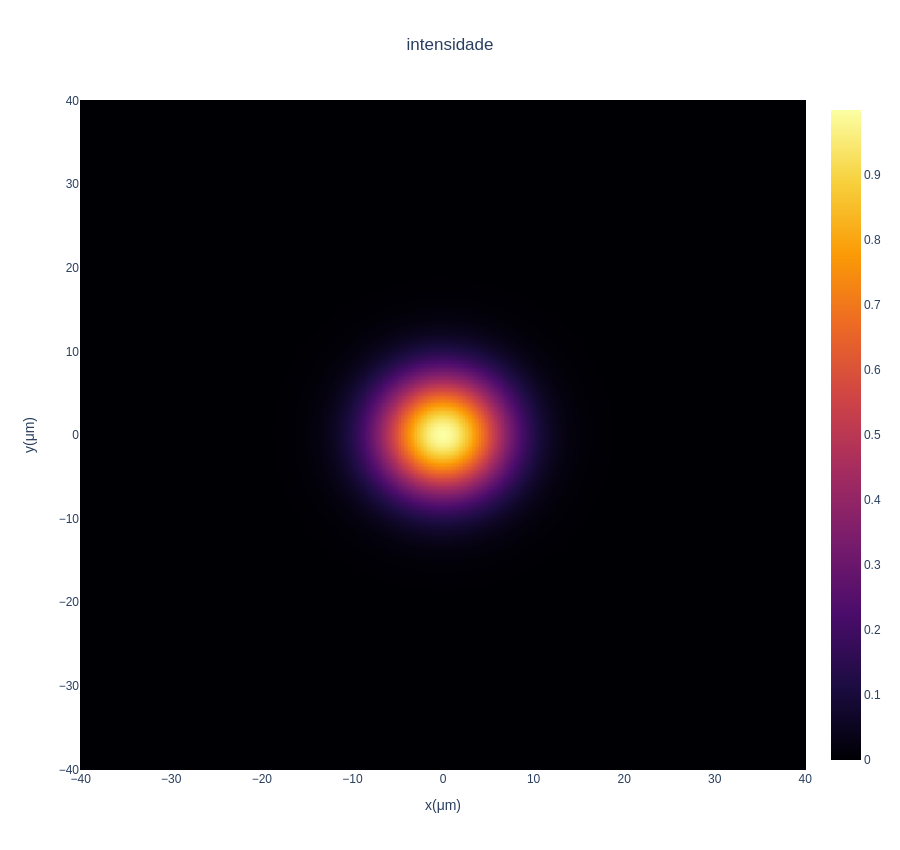

In [3]:
grafico_da_intensidade = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(G) ** 2,
        colorscale = cmap['intensidade']
    ),
    layout = layout('intensidade')
);

grafico_da_intensidade.show("png");

### Fase do feixe

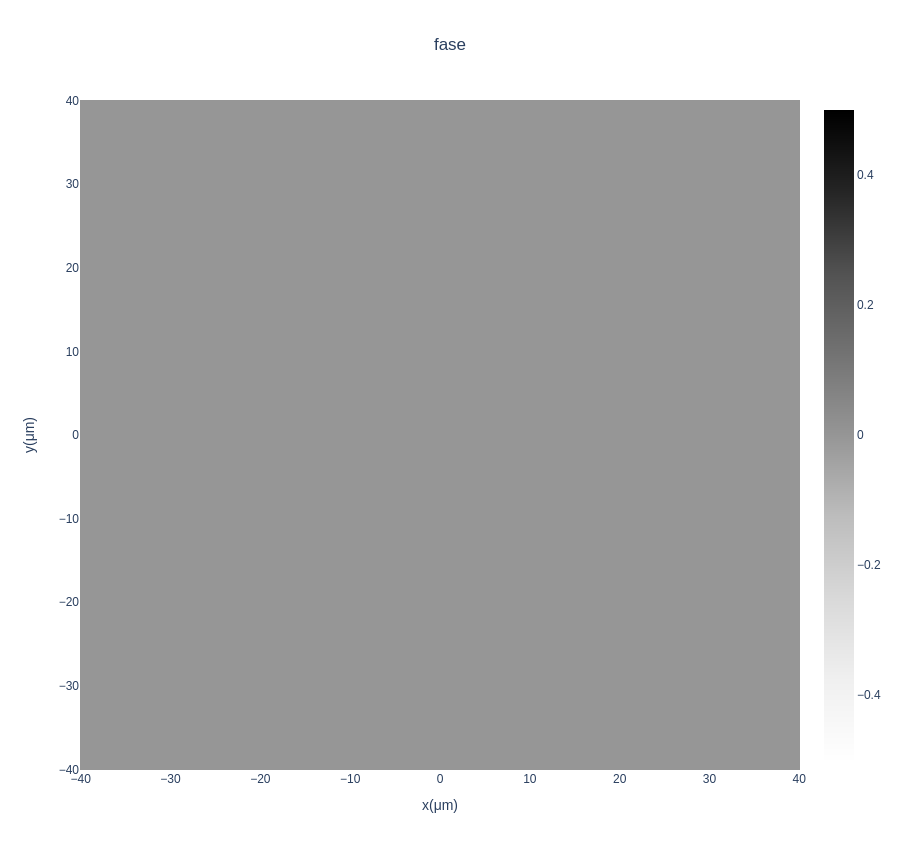

In [4]:
grafico_da_fase = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(G),
        colorscale = cmap['fase']
    ),
    layout = layout('fase')
);

grafico_da_fase.show("png");

## Feixes hermite-gauss

Um feixe hermite-gauss possui, para $z = 0$, uma envoltória da forma:

$$
    U_{w_0,l,m}(x, y) = \mathcal{A}\text{ }\mathrm{H}_l\left(\frac{\sqrt{2}}{w_0}x\right)\mathrm{H}_m\left(\frac{\sqrt{2}}{w_0}y\right)\exp\left(-\frac{x^2 + y^2}{w_0^2}\right)
$$

com $\mathrm{H}_i(u)$ sendo o polinômio de Hermite. Assim para construí-los não precisamos informar a envoltória do campo, sendo necessário apenas informar os parâmetros `w0` que corresponde à cintura do feixe, e o par de índices `indices` = `(l,m)` que são os índices dos polinômios de Hermite para os eixos x e y.

In [5]:
# criação de um feixe hermite-gauss
HG = beam.create_HG(
    w0 = 10.0,
    indices= (1, 2),
    region = (X, Y)
);

### Intensidade do feixe

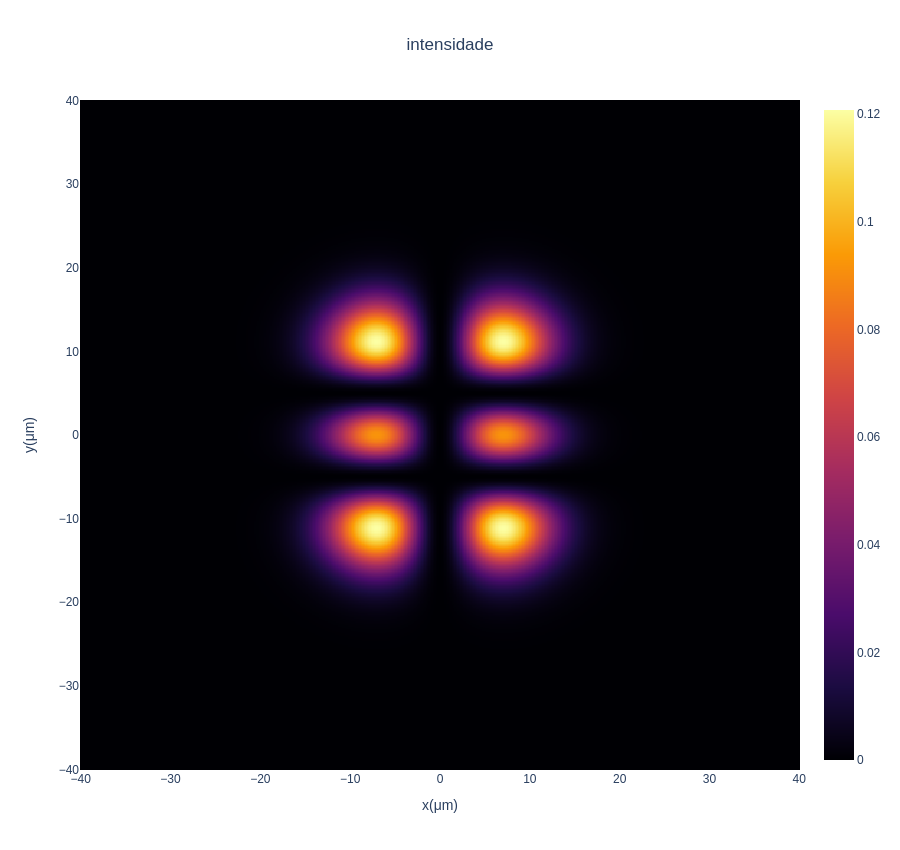

In [6]:
grafico_da_intensidade = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(HG) ** 2,
        colorscale = cmap['intensidade']
    ),
    layout = layout('intensidade')
);

grafico_da_intensidade.show("png");

### Fase do feixe

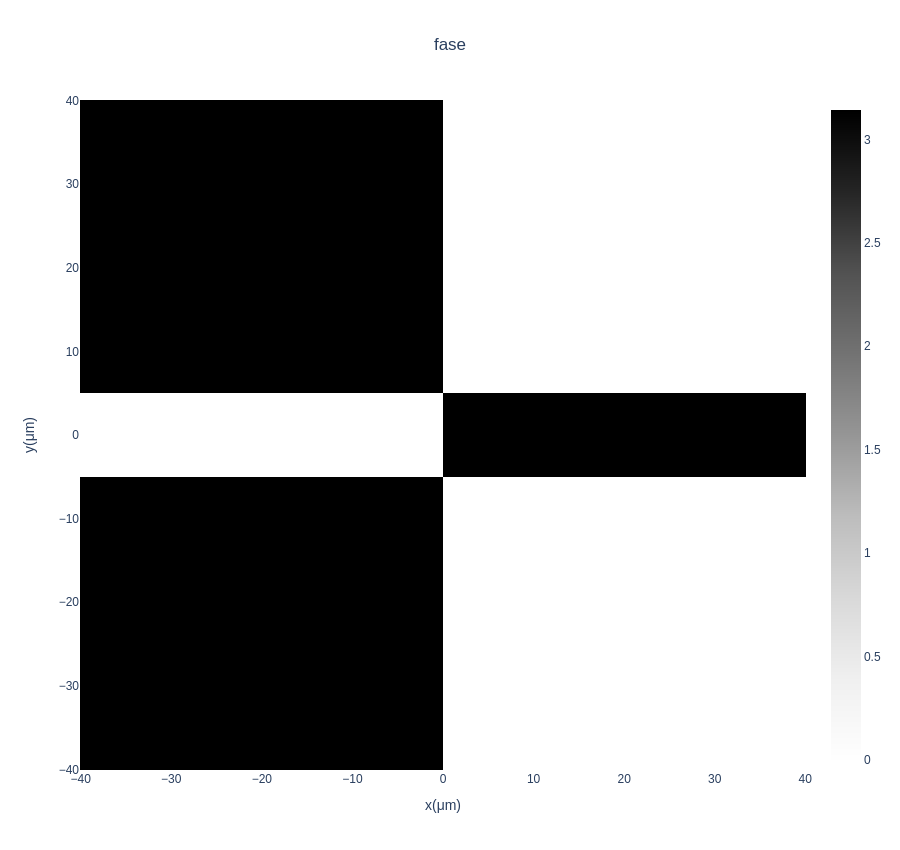

In [7]:
grafico_da_fase = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(HG),
        colorscale = cmap['fase']
    ),
    layout = layout('fase')
);

grafico_da_fase.show("png");

## Feixes laguerre-gauss

Um feixe laguerre-gauss possui, para $z = 0$, uma envoltória da forma:

$$
    U_{w_0,l,m}(\rho, \phi) = \mathcal{A}\text{ }\left(\frac{\rho}{w_0}\right)^l\mathrm{L}^l_m\left(\frac{2\rho^2}{w_0^2}\right)\exp\left(-\frac{\rho^2}{w_0^2}\right)\exp\left(-\imath\phi\right)
$$

com $\mathrm{L}^l_m(u)$ sendo o polinômio generalizado de Laguerre. Assim para construí-los não precisamos informar a envoltória do campo, sendo necessário apenas informar os parâmetros `w0` = $w_0$ que corresponde à cintura do feixe, e o par de índices `indices` = $(l,m)$ que são, respectivamente, os índices azimutal e radial do feixe.

In [20]:
# criação de um feixe laguerre-gauss
LG = beam.create_LG(
    w0 = 10.0,
    radial_index = 1,
    azimuthal_index = 0,
    region = (X, Y)
);

### Intensidade do feixe

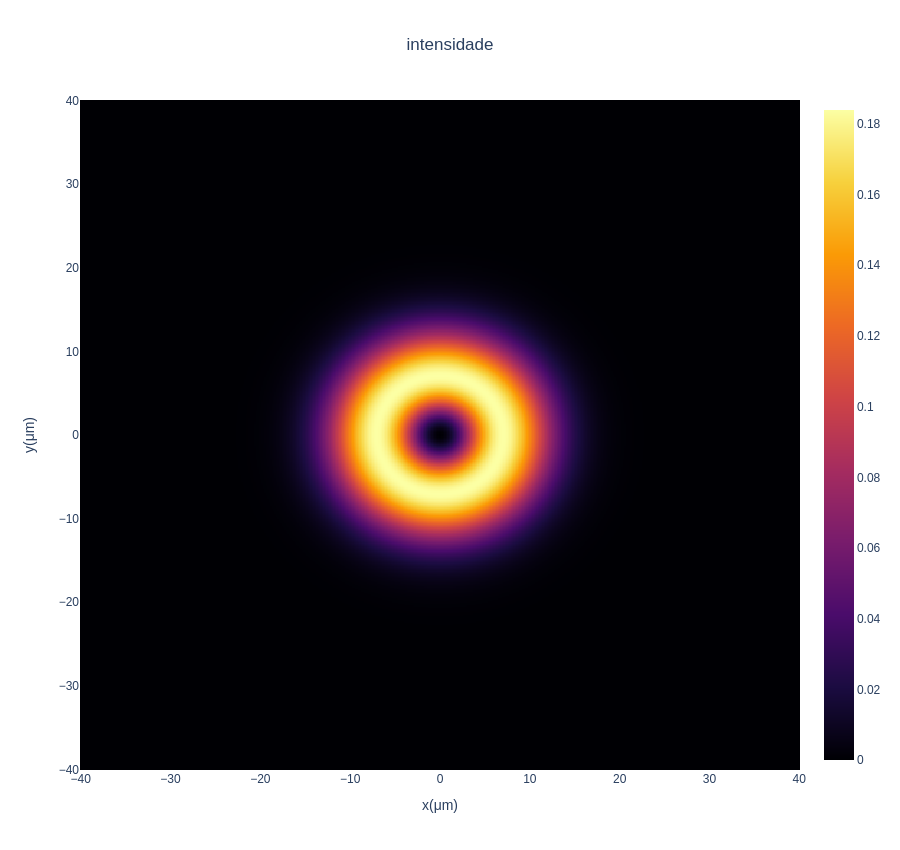

In [21]:
grafico_da_intensidade = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(LG) ** 2,
        colorscale = cmap['intensidade']
    ),
    layout = layout('intensidade')
);

grafico_da_intensidade.show("png");

### Fase do feixe

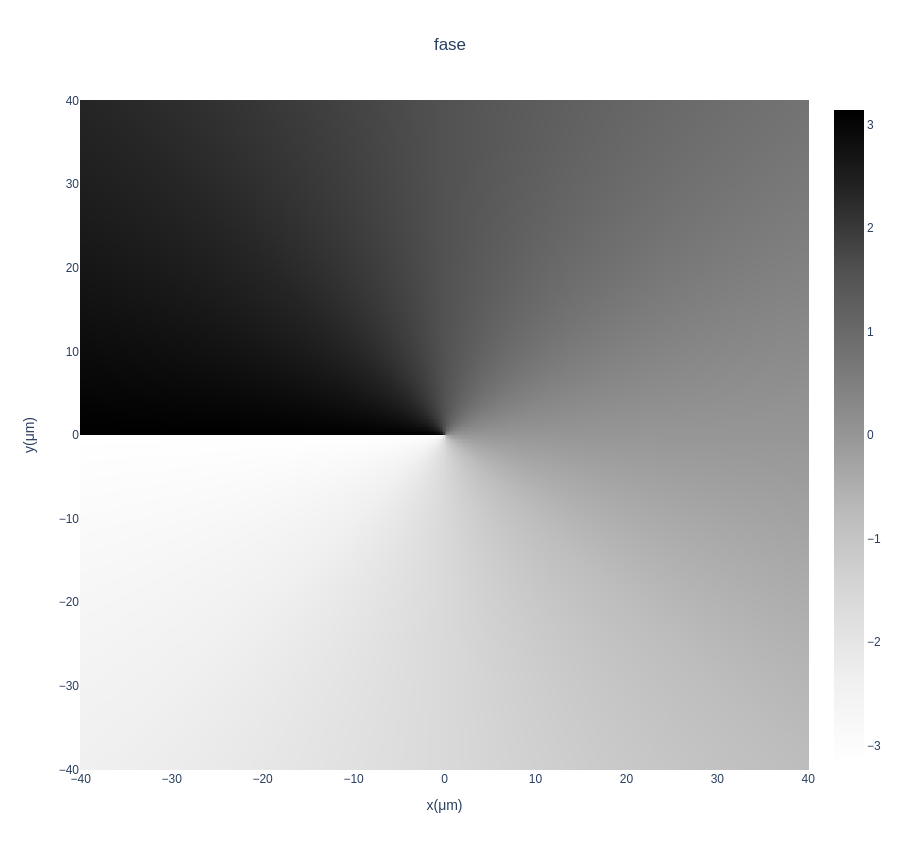

In [22]:
grafico_da_fase = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(LG),
        colorscale = cmap['fase']
    ),
    layout = layout('fase')
);

grafico_da_fase.show("png");

## Feixes bessel

Um feixe bessel possui, para $z = 0$, uma envoltória da forma:

$$
    U_{k_t,m}(\rho, \phi) = \mathrm{J}_m\left(k_t\rho\right)\exp\left(\imath m \phi\right)
$$

com $\mathrm{J}_m(u)$ sendo a função de Bessel. Assim para construí-los não precisamos informar a envoltória do campo, sendo necessário apenas informar os parâmetros `k_t` = $k_t$, e o índice `m` que corresponde à ordem da função de Bessel.

In [11]:
# criação de um feixe bessel
J = beam.create_J(
    k_t = 1.0,
    m = 2,
    region = (X, Y)
);

### Intensidade do feixe

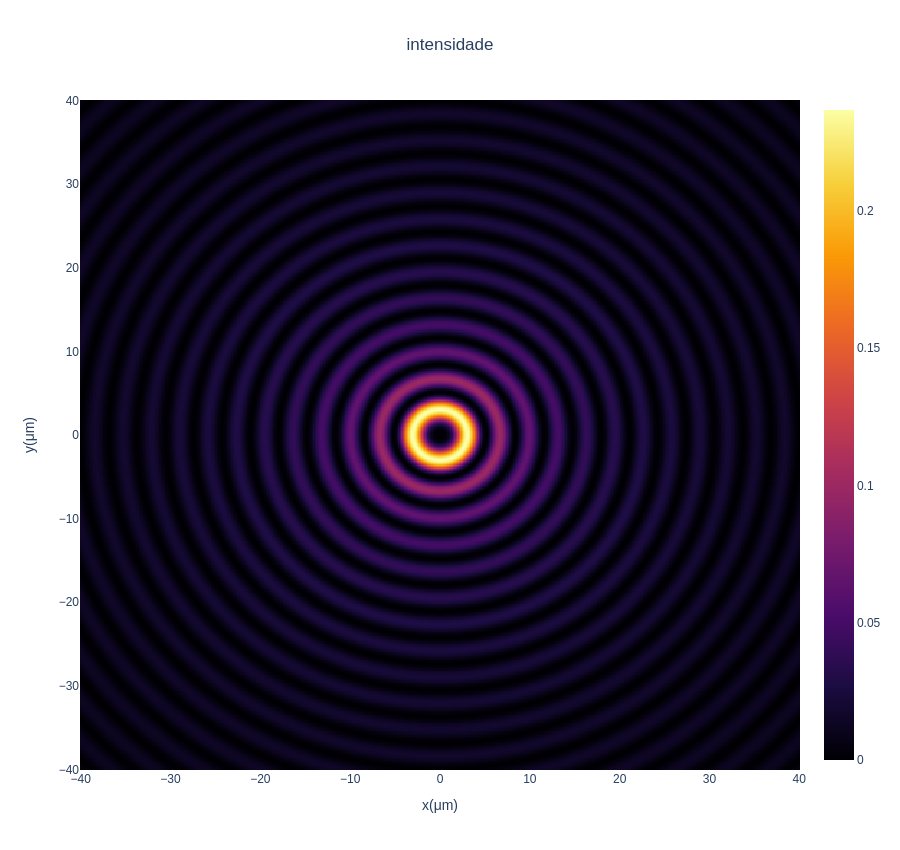

In [12]:
grafico_da_intensidade = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(J) ** 2,
        colorscale = cmap['intensidade']
    ),
    layout = layout('intensidade')
);

grafico_da_intensidade.show("png");

### Fase do feixe

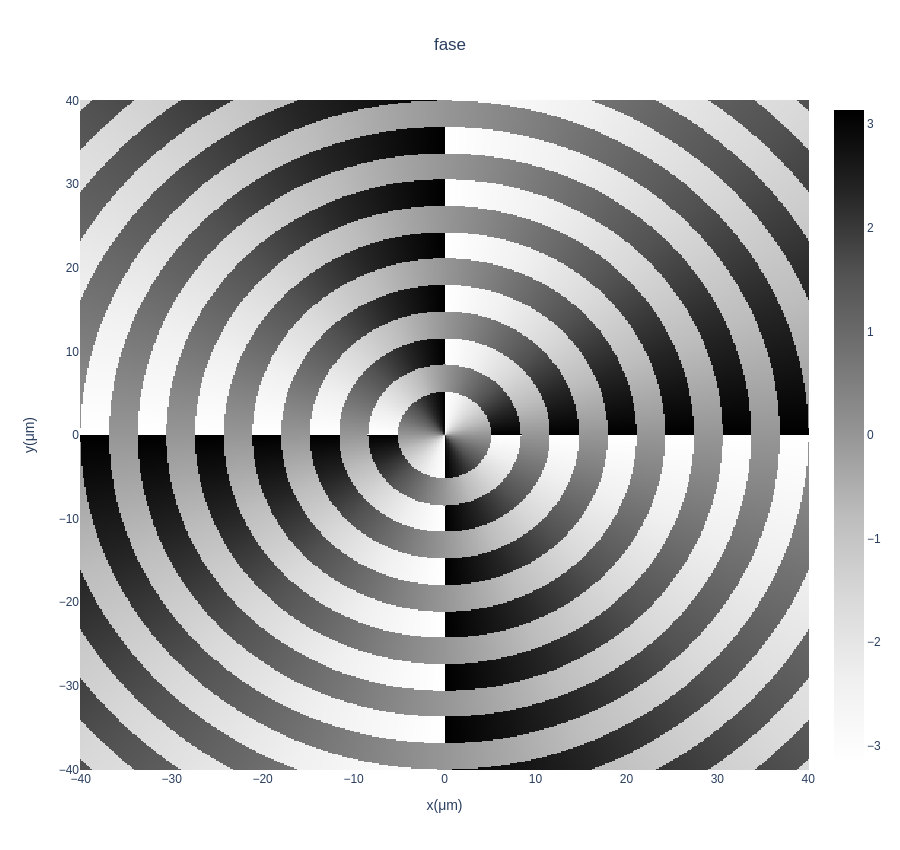

In [13]:
grafico_da_fase = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(J),
        colorscale = cmap['fase']
    ),
    layout = layout('fase')
);

grafico_da_fase.show("png");